In [1]:
import scipy.io
import os
import random
import numpy as np
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
person01 = scipy.io.loadmat('person01.mat')
person02 = scipy.io.loadmat('person02.mat')

In [3]:
person01_iriscode = person01['iriscode']

In [4]:
print(len(person01['iriscode']))

20


In [5]:
r1 = person01_iriscode[3]
r2 = person01_iriscode[5]
h_d = hamming(r1,r2)
print(h_d)

0.06666666666666667


In [6]:
# data holding iris code for everyone
data = {}

# depends on where the notebook locates, it might be useful
# not in this case tho
directory = 'Assignment-1/Task_2/'

# loop through file names
for ppl in range(1,21):
    filename = f'person{ppl:02}.mat'
    # change if the notebook is located differently
    path = os.path.join(filename)
    
    # load .mat files, isolate iris code
    mat_dict = scipy.io.loadmat(path)
    mat_iris = mat_dict['iriscode']
    
    # each person has a 20 by 30 matrix
    data[f'person{ppl:02}'] = mat_iris

In [27]:
print(len(mat_iris))

20


In [7]:
num_people = len(data)
size_sample = 1000

In [8]:
# HD_S holding 1000 HD values for each person
HD_S = np.zeros((num_people, size_sample))

# loop through each person
for ppl in range(1,num_people+1): 
    iriscode = data[f'person{ppl:02}']
    
    # loop through 1000 times comparisons
    for i in range(0,size_sample):
        # get randomly two rows
        idx1, idx2 = random.sample(range(iriscode.shape[0]),2)
        row1 = iriscode[idx1]
        row2 = iriscode[idx2]
        
        # compute the hamming distance and append
        hamming_dist = hamming(row1,row2)
        HD_S[ppl-1, i] = hamming_dist
        

In [9]:
# HD_D holding 1000 HD values across all people
HD_D = np.zeros(size_sample)

# loop through 1000 times
for i in range(0, size_sample):
    # choose two random person
    ppl1, ppl2 = random.sample(range(1, num_people+1),2)
    iriscode1 = data[f'person{ppl1:02}']
    iriscode2 = data[f'person{ppl2:02}']
    # choose random row for each code
    idx1, idx2 = random.sample(range(iriscode1.shape[0]),2)
    row1 = iriscode1[idx1]
    row2 = iriscode2[idx2]
    
    # compute hamming distance
    hamming_dist = hamming(row1, row2)
    HD_D[i] = hamming_dist
    

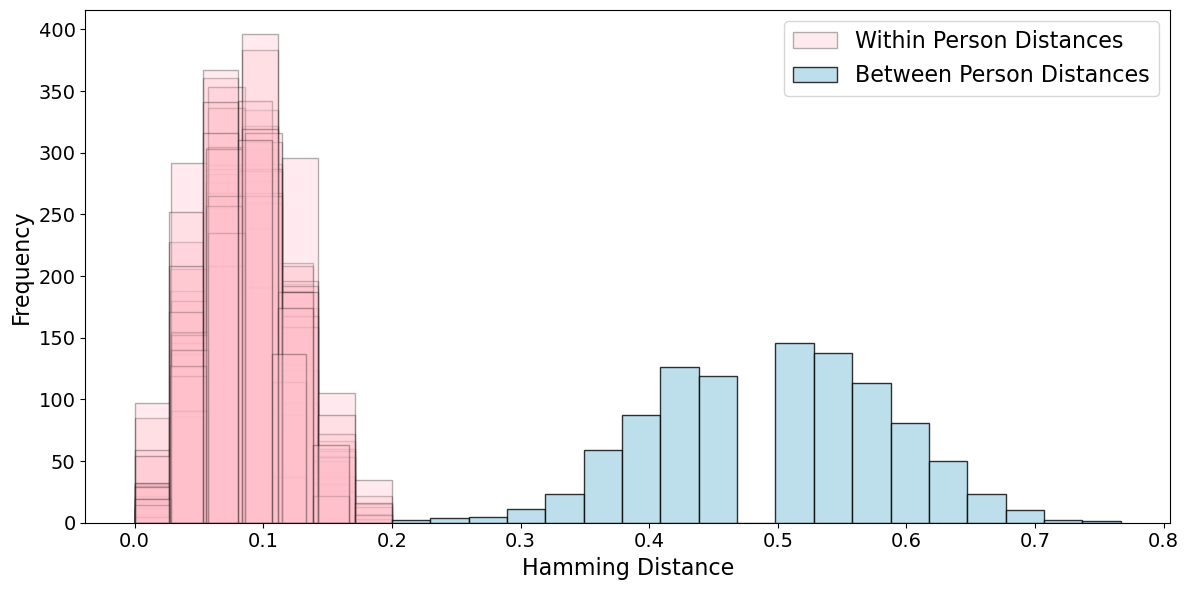

In [10]:
bin_width = 0.03

for i in range(1, num_people):
    range_of_data = np.max(HD_S[i] - np.min(HD_S[i]))
    num_bins = int(np.ceil(range_of_data/bin_width))

# plotting histogram
plt.figure(figsize=(12, 6))

range_of_data = np.max(HD_S[0] - np.min(HD_S[0]))
num_bins = int(np.ceil(range_of_data/bin_width))
plt.hist(HD_S[0], bins=num_bins, alpha=0.3, label='Within Person Distances', edgecolor='black', color='pink')
for i in range(1, num_people):
    range_of_data = np.max(HD_S[i] - np.min(HD_S[i]))
    num_bins = int(np.ceil(range_of_data/bin_width))
    plt.hist(HD_S[i], bins=num_bins, alpha=0.3, edgecolor='black', color='pink')
    
range_of_data = np.max(HD_D - np.min(HD_D))
num_bins = int(np.ceil(range_of_data/bin_width))
plt.hist(HD_D, bins=num_bins, alpha=0.8, label='Between Person Distances', edgecolor='black', color='lightblue')
plt.xlabel('Hamming Distance',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
mean_S = np.mean(HD_S)
var_S = np.var(HD_S)
mean_D = np.mean(HD_D)
var_D = np.var(HD_D)

In [12]:
print(mean_S,mean_D, var_S,var_D)

0.08508166666666667 0.4956666666666667 0.0015722766638888888 0.007981222222222221


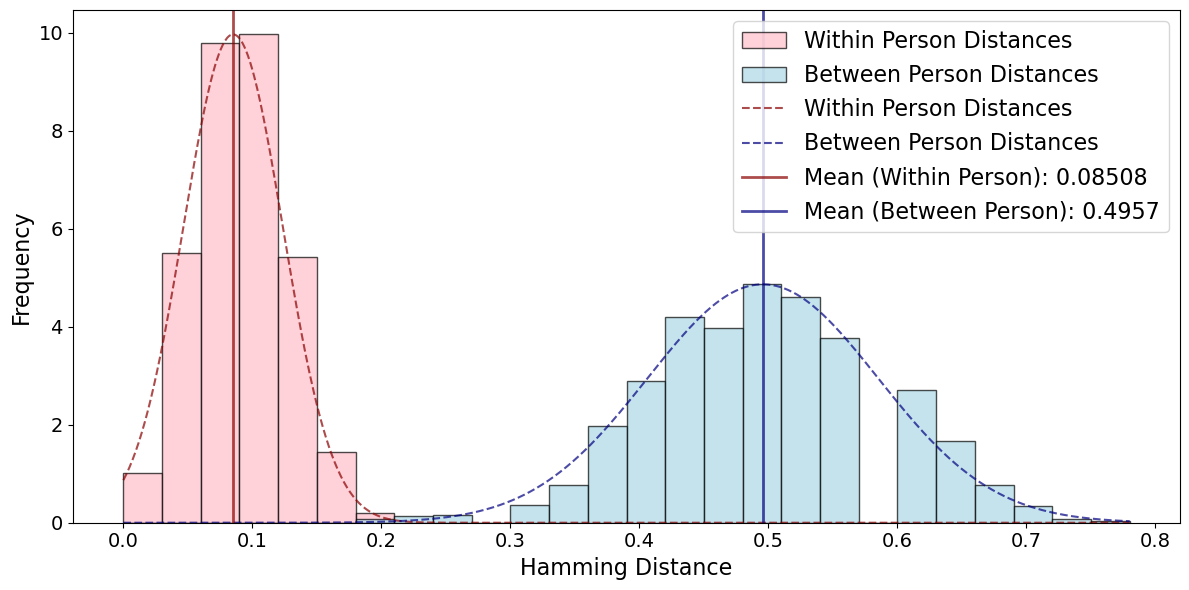

In [13]:
# set bin width
bin_width = 0.03

# calculate means and variances
mean_S = np.mean([np.mean(HD_S[i]) for i in range(num_people)])
var_S = np.mean([np.var(HD_S[i]) for i in range(num_people)])
mean_D = np.mean(HD_D)
var_D = np.var(HD_D)

# define bin edges
bins = np.arange(min(np.min(HD_S), np.min(HD_D)), max(np.max(HD_S), np.max(HD_D)) + bin_width, bin_width)

# histograms
hist_S, _ = np.histogram(np.concatenate(HD_S), bins=bins, density=True)
hist_D, _ = np.histogram(HD_D, bins=bins, density=True)

# Gaussian curves
x = np.linspace(min(bins), max(bins), 1000)
pdf_S = norm.pdf(x, mean_S, np.sqrt(var_S))
pdf_D = norm.pdf(x, mean_D, np.sqrt(var_D))

# scale the Gaussian curves
scale_S = np.max(hist_S) / np.max(pdf_S)
scale_D = np.max(hist_D) / np.max(pdf_D)

pdf_S_scaled = pdf_S * scale_S
pdf_D_scaled = pdf_D * scale_D

# plot
plt.figure(figsize=(12, 6))
# histograms
plt.hist(np.concatenate(HD_S), bins=bins, alpha=0.7, label='Within Person Distances', edgecolor='black', color='pink', density=True)
plt.hist(HD_D, bins=bins, alpha=0.7, label='Between Person Distances', edgecolor='black', color='lightblue', density=True)
# Gaussian curve
plt.plot(x, pdf_S_scaled, color='darkred', linestyle='--', label='Within Person Distances', alpha=0.7)
plt.plot(x, pdf_D_scaled, color='navy', linestyle='--', label='Between Person Distances', alpha=0.7)
# mean
plt.axvline(mean_S, color='darkred', linestyle='-', linewidth=2, label=f'Mean (Within Person): {mean_S:.5f}', alpha=0.7)
plt.axvline(mean_D, color='navy', linestyle='-', linewidth=2, label=f'Mean (Between Person): {mean_D:.4f}', alpha=0.7)

# formatting
plt.xlabel('Hamming Distance', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
# set the false acceptance rate at 0.0005
false_accept_rate = 0.0005

std_D = np.sqrt(var_D)
std_S = np.sqrt(var_S)

# use inverse cdf (ppf) to calculate the criterion
decision_criterion = norm.ppf(false_accept_rate, loc=mean_D, scale=std_D)

false_rejection_rate = 1 - norm.cdf(decision_criterion, loc=mean_S, scale=std_S)
# print results
print(f"decision criterion: {decision_criterion}\nfalse rejection rate: {false_rejection_rate}")

decision criterion: 0.20169862123676807
false rejection rate: 0.0012308764457992227


In [46]:
# load test person iris code
mat_test = scipy.io.loadmat('testperson.mat')
test_iris = mat_test['iriscode'].flatten()

In [45]:
# create the mask
mask = test_iris != 2

hamming_distances = []
# loop through each person
for ppl in range(1,num_people+1): 
    iriscode = data[f'person{ppl:02}']
    min_hd = float('inf')
    for row in iriscode:
        # compute the humming distance with the mask
        masked_row = row[mask]
        masked_test_iris = test_iris[mask]
        hamming_d = hamming(masked_row, masked_test_iris)
        
        # save the min hamming distance
        if hamming_d < min_hd:
            min_hd = hamming_d
    # append the hamming minimum hamming distances
    hamming_distances.append(min_hd)
    
print(hamming_distances)

[0.4, 0.3, 0.3, 0.45, 0.0, 0.65, 0.4, 0.3, 0.6, 0.35, 0.55, 0.35, 0.6, 0.45, 0.35, 0.55, 0.35, 0.5, 0.3, 0.3]


In [44]:
# person with the minimum hamming distance
best_match_index = np.argmin(hamming_distances) + 1
print(f"The test iris code most likely belongs to person: {best_match_index}")

The test iris code most likely belongs to person: 5
